In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


In [5]:
df=pd.read_csv('Attrition Dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [6]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
# Check for columns with all NaN values
empty_columns = df.columns[df.isnull().all()]
empty_columns

Index([], dtype='object')

In [9]:
#-- Get columns with dtype 'object'
object_columns = df.columns[df.dtypes == 'object']
print(object_columns)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


In [10]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [11]:
# shortcut to see all value count 
value_counts = {col: df[col].value_counts() for col in object_columns}
value_counts

{'Attrition': No     1233
 Yes     237
 Name: Attrition, dtype: int64,
 'BusinessTravel': Travel_Rarely        1043
 Travel_Frequently     277
 Non-Travel            150
 Name: BusinessTravel, dtype: int64,
 'Department': Research & Development    961
 Sales                     446
 Human Resources            63
 Name: Department, dtype: int64,
 'EducationField': Life Sciences       606
 Medical             464
 Marketing           159
 Technical Degree    132
 Other                82
 Human Resources      27
 Name: EducationField, dtype: int64,
 'Gender': Male      882
 Female    588
 Name: Gender, dtype: int64,
 'JobRole': Sales Executive              326
 Research Scientist           292
 Laboratory Technician        259
 Manufacturing Director       145
 Healthcare Representative    131
 Manager                      102
 Sales Representative          83
 Research Director             80
 Human Resources               52
 Name: JobRole, dtype: int64,
 'MaritalStatus': Married     67

In [12]:
encoder = OneHotEncoder(sparse_output=False)
onehot = encoder.fit_transform(df[object_columns])

In [13]:
feature_names = encoder.get_feature_names_out(object_columns)
df_encoded = pd.DataFrame(onehot, columns=feature_names)
df_encoded.head()

,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [14]:
df.drop(columns=object_columns,inplace=True)
df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


In [15]:
df_OHC = pd.concat([df,df_encoded], axis=1)
df_OHC.drop(columns='Attrition_No', inplace=True)
df_OHC.head()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,49,279,8,1,1,2,3,61,2,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,37,1373,2,2,1,4,4,92,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,33,1392,3,4,1,5,4,56,3,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,27,591,2,1,1,7,1,40,3,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [16]:
Y=df_OHC.Attrition_Yes
X=df_OHC.drop(columns='Attrition_Yes')

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2,random_state=0)

In [18]:
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [19]:
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42),
    'KNeighbors': KNeighborsClassifier()
}

In [27]:
# Dictionary to store results
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate mean absolute error
    mae = mean_absolute_error(y_test, y_pred)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store the results
    results[model_name] = {'MAE': mae, 'Accuracy': accuracy}

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

                         MAE  Accuracy
RandomForest        0.142857  0.857143
DecisionTree        0.217687  0.782313
LogisticRegression  0.166667  0.833333
SVM                 0.166667  0.833333
KNeighbors          0.200680  0.799320


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'Model'}, inplace=True)
results_df

,Model,MAE,Accuracy
0,RandomForest,0.142857,0.857143
1,DecisionTree,0.217687,0.782313
2,LogisticRegression,0.166667,0.833333
3,SVM,0.166667,0.833333
4,KNeighbors,0.200680,0.799320


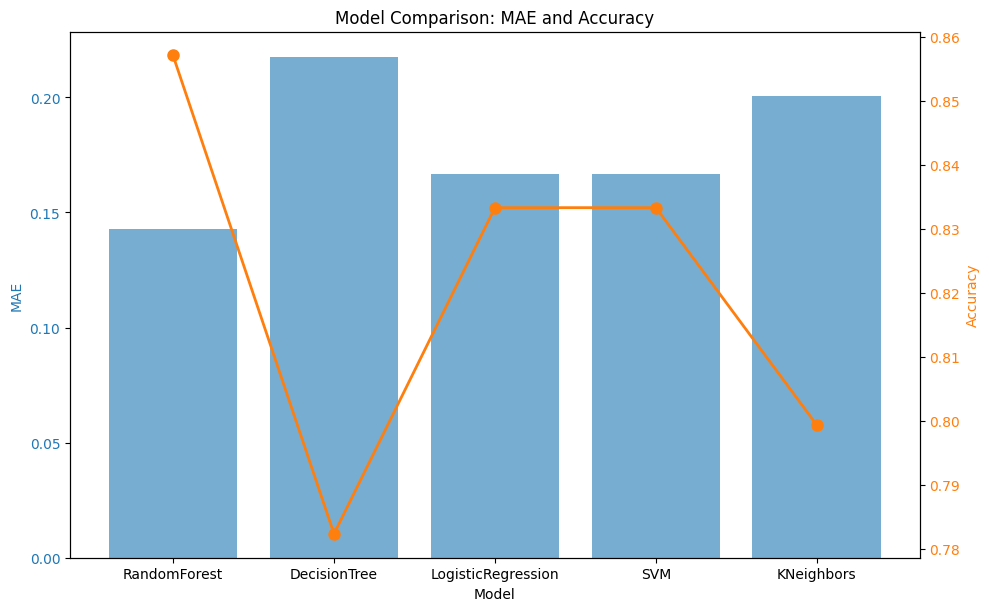

In [30]:
import matplotlib.pyplot as plt
# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot MAE
ax1.set_xlabel('Model')
ax1.set_ylabel('MAE', color='tab:blue')
ax1.bar(results_df['Model'], results_df['MAE'], color='tab:blue', alpha=0.6, label='MAE')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Plot Accuracy
ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy', color='tab:orange')
ax2.plot(results_df['Model'],results_df['Accuracy'], color='tab:orange', marker='o', linestyle='-', linewidth=2, markersize=8, label='Accuracy')
ax2.tick_params(axis='y', labelcolor='tab:orange')

fig.tight_layout()
plt.title('Model Comparison: MAE and Accuracy')
plt.show()